In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data=pd.read_csv("/content/IMDb Movies India.csv (1).zip",encoding='latin1')
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
#to convert duration to string values
data['Duration'] = data['Duration'].astype(str).str.extract('(\d+)')[0].astype(float)

In [ ]:
#encode categorical variables using one hot encoding
data= pd.get_dummies(data, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])


In [ ]:
#Separating features and target variable
x = data.drop(columns=['Name', 'Year', 'Rating', 'Votes'])
y = data['Rating']


In [ ]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Filling misiing values with the mean
x_train = x_train.fillna(x_train.mean())
x_test = x_test.fillna(x_test.mean())
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean())

In [ ]:
# Scaling the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#model training
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
model=Ridge(alpha=1.0)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print("Mean squared error",mse)

Mean squared error 3.2238551034165113


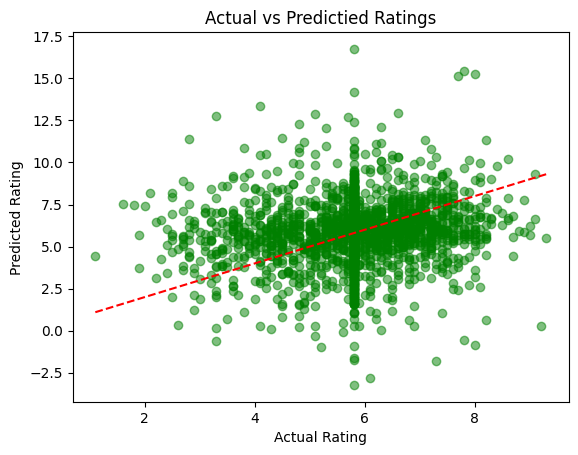

In [13]:
plt.scatter(y_test,y_pred,color="green",alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color="red",linestyle="--")
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predictied Ratings")
plt.show()